In [1]:
# to do:
# - import dataset
# - explorer (noms des columns, taille, valeurs manquantes, valeurs uniques, type de données)
# - visualisation (histogramme, boxplot, scatterplot, heatmap, pairplot)
# - nettoyage (valeurs manquantes, valeurs aberrantes, valeurs dupliquées, valeurs incohérentes)
# - feature engineering (création de nouvelles variables, transformation de variables, sélection de variables)

In [2]:
%pip install pandas numpy matplotlib seaborn cartopy folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import folium
from folium import plugins

warnings.filterwarnings('ignore')

  Using cached Cartopy-0.22.0-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached folium-0.15.0-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached shapely-2.0.2-cp311-cp311-win_amd64.whl.metadata (7.2 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Using cached pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata (31 kB)
  Using cached branca-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
Using cached Cartopy-0.22.0-cp311-cp311-win_amd64.whl (11.2 MB)
Using cached folium-0.15.0-py2.py3-none-any.whl (100 kB)
Using cached branca-0.7.0-py3-none-any.whl (25 kB)
Using cached pyproj-3.6.1-cp311-cp311-win_amd64.whl (6.1 MB)
Using cached shapely-2.0.2-cp311-cp311-win_amd64.whl (1.4 MB)
   ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/62.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/62.6 kB ? eta -:--:--
   ------ -------------------------

In [3]:
landslides = pd.read_csv('data\Global_Landslide_Catalog_Export.csv', sep=';')
landslides.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,"36,619",Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,"14,708",San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,"20,908",Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,"798,634",Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [4]:
landslides[["event_date2", "event_hour", "eventAmOrPm"]]= landslides["event_date"].str.split(expand= True)
# landslides["event_hour"]=datetime(landslides["event_hour"])
landslides

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,event_date2,event_hour,eventAmOrPm
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.450000,32.562500,08/01/2008,12:00:00,AM
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.663000,45.420000,01/02/2009,02:00:00,AM
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.358700,-11.129500,01/19/2007,12:00:00,AM
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.708000,28.837800,07/31/2009,12:00:00,AM
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.897800,10.333600,10/16/2010,12:00:00,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409,04/01/2017,01:34:00,PM
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080,03/25/2017,05:32:00,PM
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606,12/15/2016,05:00:00,AM
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",04/29/2017 07:03:00 PM,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395,04/29/2017,07:03:00,PM


In [5]:
landslides[["event_hour2", "event_minute", "event_second"]]= landslides["event_hour"].str.split(':',expand= True)
landslides

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,created_date,last_edited_date,longitude,latitude,event_date2,event_hour,eventAmOrPm,event_hour2,event_minute,event_second
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.450000,32.562500,08/01/2008,12:00:00,AM,12,00,00
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.663000,45.420000,01/02/2009,02:00:00,AM,02,00,00
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.358700,-11.129500,01/19/2007,12:00:00,AM,12,00,00
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.708000,28.837800,07/31/2009,12:00:00,AM,12,00,00
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.897800,10.333600,10/16/2010,12:00:00,PM,12,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409,04/01/2017,01:34:00,PM,01,34,00
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080,03/25/2017,05:32:00,PM,05,32,00
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606,12/15/2016,05:00:00,AM,05,00,00
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",04/29/2017 07:03:00 PM,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395,04/29/2017,07:03:00,PM,07,03,00


In [6]:
landslides[["event_date_day", "event_date_month", "event_date_year"]]= landslides["event_date2"].str.split('/',expand= True)
# landslides[["event_time2"]]= landslides["event_date"].str.split('/',expand= True).concat()
landslides

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,latitude,event_date2,event_hour,eventAmOrPm,event_hour2,event_minute,event_second,event_date_day,event_date_month,event_date_year
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,32.562500,08/01/2008,12:00:00,AM,12,00,00,08,01,2008
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,45.420000,01/02/2009,02:00:00,AM,02,00,00,01,02,2009
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,-11.129500,01/19/2007,12:00:00,AM,12,00,00,01,19,2007
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,28.837800,07/31/2009,12:00:00,AM,12,00,00,07,31,2009
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,10.333600,10/16/2010,12:00:00,PM,12,00,00,10,16,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,-7.853409,04/01/2017,01:34:00,PM,01,34,00,04,01,2017
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,33.403080,03/25/2017,05:32:00,PM,05,32,00,03,25,2017
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,26.181606,12/15/2016,05:00:00,AM,05,00,00,12,15,2016
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",04/29/2017 07:03:00 PM,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,40.886395,04/29/2017,07:03:00,PM,07,03,00,04,29,2017


In [7]:
landslides["event_hour2"]= landslides["event_hour2"].astype(int)
landslides["event_date"]= pd.to_datetime(landslides["event_date"])

In [8]:
landslides.loc[landslides['eventAmOrPm'] == 'PM', 'event_hour2'] = landslides.loc[landslides['eventAmOrPm'] == 'PM', 'event_hour2'] + 12
landslides

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,latitude,event_date2,event_hour,eventAmOrPm,event_hour2,event_minute,event_second,event_date_day,event_date_month,event_date_year
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,2008-08-01 00:00:00,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,32.562500,08/01/2008,12:00:00,AM,12,00,00,08,01,2008
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,2009-01-02 02:00:00,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,45.420000,01/02/2009,02:00:00,AM,2,00,00,01,02,2009
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,2007-01-19 00:00:00,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,-11.129500,01/19/2007,12:00:00,AM,12,00,00,01,19,2007
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",2009-07-31 00:00:00,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,28.837800,07/31/2009,12:00:00,AM,12,00,00,07,31,2009
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",2010-10-16 12:00:00,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,10.333600,10/16/2010,12:00:00,PM,24,00,00,10,16,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",2017-04-01 13:34:00,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,-7.853409,04/01/2017,01:34:00,PM,13,34,00,04,01,2017
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",2017-03-25 17:32:00,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,33.403080,03/25/2017,05:32:00,PM,17,32,00,03,25,2017
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",2016-12-15 05:00:00,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,26.181606,12/15/2016,05:00:00,AM,5,00,00,12,15,2016
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",2017-04-29 19:03:00,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,40.886395,04/29/2017,07:03:00,PM,19,03,00,04,29,2017


In [9]:
# exploration

# columns names
print("Columns names: \n", landslides.columns)

# size
print("\nSize: ", landslides.shape)

# data types
print("\nData types: \n", landslides.dtypes)


Columns names: 
 Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time',
       'event_title', 'event_description', 'location_description',
       'location_accuracy', 'landslide_category', 'landslide_trigger',
       'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count',
       'storm_name', 'photo_link', 'notes', 'event_import_source',
       'event_import_id', 'country_name', 'country_code',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date',
       'created_date', 'last_edited_date', 'longitude', 'latitude',
       'event_date2', 'event_hour', 'eventAmOrPm', 'event_hour2',
       'event_minute', 'event_second', 'event_date_day', 'event_date_month',
       'event_date_year'],
      dtype='object')

Size:  (11033, 40)

Data types: 
 source_name                          object
source_link                          object
event_id                             object
event

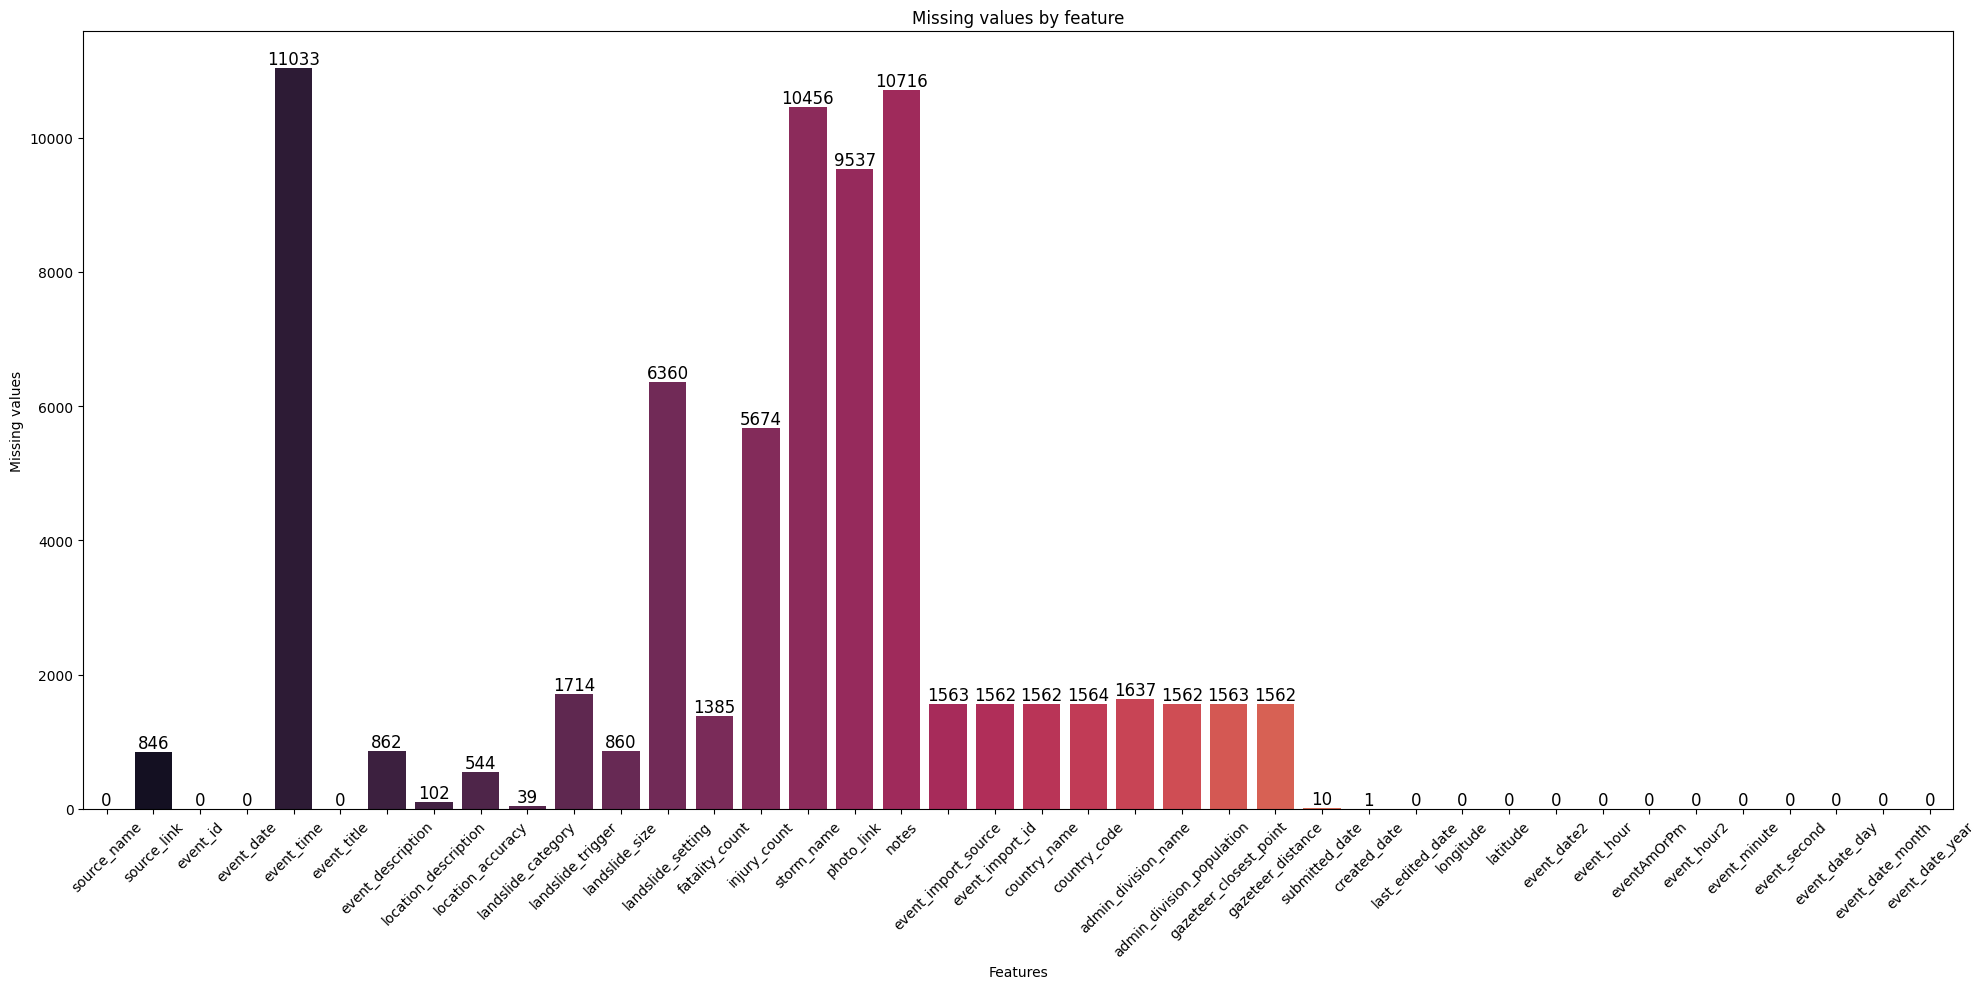

In [10]:

# missing values
missing_values = landslides.isnull().sum() + landslides.applymap(lambda x: (str)(x).strip() == 'unknown').sum() 

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=missing_values.index, y=missing_values, palette="rocket") #order=missing_values.sort_values(ascending=False).index
# for i in ax.containers:
#     ax.bar_label(i,)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Missing values')
plt.title('Missing values by feature')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'unique values')

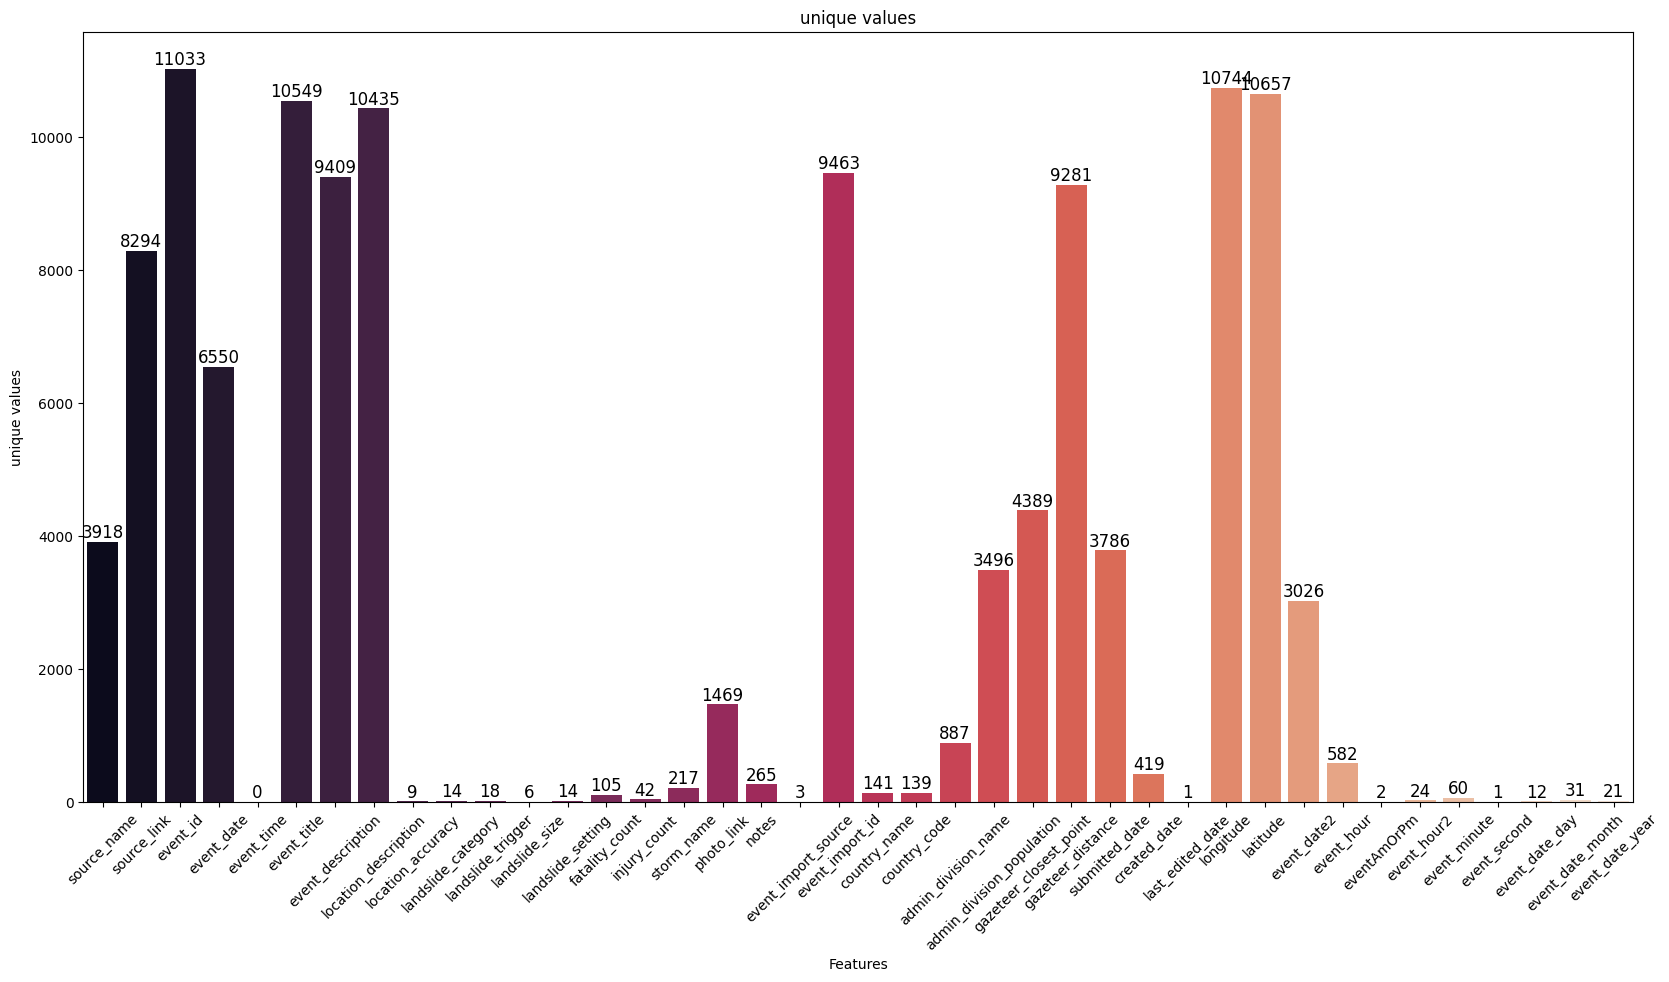

In [11]:



unique_values =  landslides.nunique()

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=unique_values.index, y=unique_values, palette="rocket") #order=missing_values.sort_values(ascending=False).index
# for i in ax.containers:
#     ax.bar_label(i,)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('unique values')
plt.title('unique values')

Text(0.5, 1.0, 'unique values')

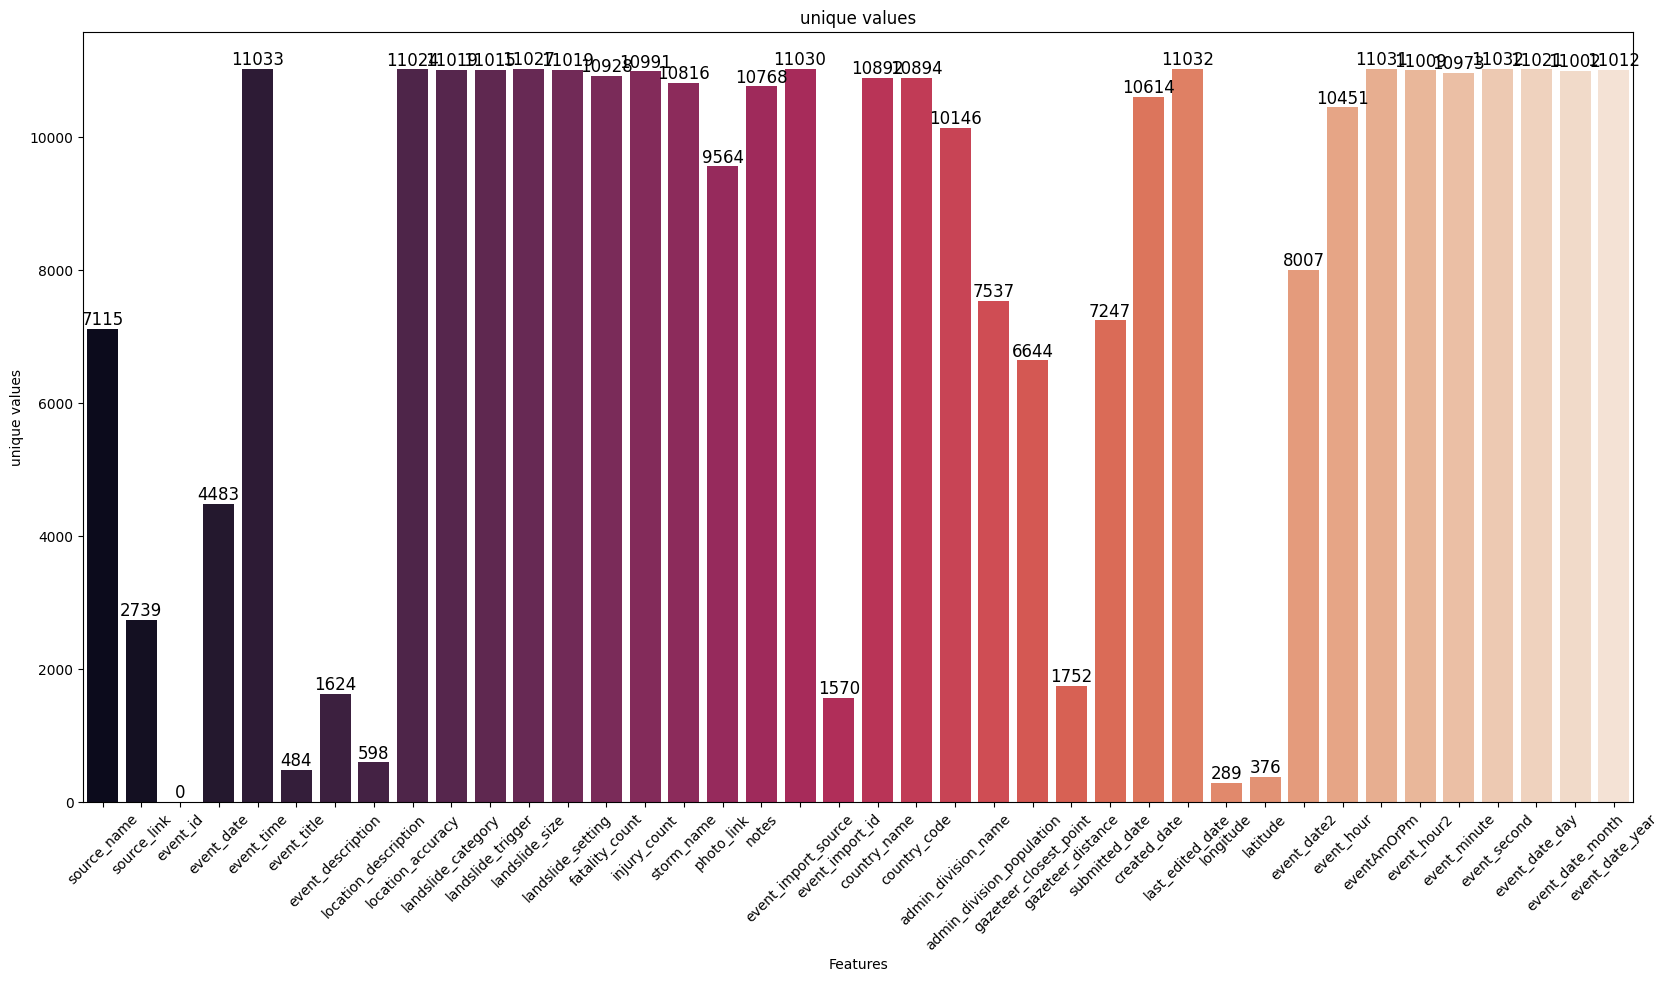

In [12]:
non_unique_values =  len(landslides)-landslides.nunique()

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=non_unique_values.index, y=non_unique_values, palette="rocket") #order=missing_values.sort_values(ascending=False).index
# for i in ax.containers:
#     ax.bar_label(i,)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('unique values')
plt.title('unique values')

In [13]:
duplicateRowsDF = landslides[landslides.duplicated()]
duplicateRowsDF

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,latitude,event_date2,event_hour,eventAmOrPm,event_hour2,event_minute,event_second,event_date_day,event_date_month,event_date_year


In [14]:
duplicateRowsDF['event_date']=duplicateRowsDF['event_date'].astype(str)
duplicateRowsDF.dtypes

source_name                   object
source_link                   object
event_id                      object
event_date                    object
event_time                   float64
event_title                   object
event_description             object
location_description          object
location_accuracy             object
landslide_category            object
landslide_trigger             object
landslide_size                object
landslide_setting             object
fatality_count                object
injury_count                 float64
storm_name                    object
photo_link                    object
notes                         object
event_import_source           object
event_import_id               object
country_name                  object
country_code                  object
admin_division_name           object
admin_division_population     object
gazeteer_closest_point        object
gazeteer_distance            float64
submitted_date                object
c

In [15]:
duplicateRowsDF = landslides[landslides.duplicated(landslides[["event_hour","event_minute","country_name","landslide_category","event_date_day","event_date_month","event_date_year"]])]
duplicateRowsDF=duplicateRowsDF.sort_values(by="event_date_year")
duplicateRowsDF

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,latitude,event_date2,event_hour,eventAmOrPm,event_hour2,event_minute,event_second,event_date_day,event_date_month,event_date_year
3716,USGS,http://landslides.usgs.gov/recent/archives/199...,"7,830",1996-12-26 00:00:00,NaN,Western Columbia River Gorge,The western part of the Columbia Gorge on the ...,Western Columbia River Gorge,50km,debris_flow,...,45.549200,12/26/1996,12:00:00,AM,12,00,00,12,26,1996
5998,USGS,http://landslides.usgs.gov/recent/archives/199...,"7,829",1997-01-01 00:00:00,NaN,Magnolia Area,NaN,Magnolia Area,1km,debris_flow,...,47.642200,01/01/1997,12:00:00,AM,12,00,00,01,01,1997
1091,USGS,http://landslides.usgs.gov/recent/archives/199...,"7,826",1997-01-01 00:00:00,NaN,West Seattle,http://landslides.usgs.gov/recent/archives/199...,West Seattle,1km,debris_flow,...,47.587600,01/01/1997,12:00:00,AM,12,00,00,01,01,1997
8185,USGS,http://landslides.usgs.gov/recent/archives/199...,"7,822",1997-01-19 00:00:00,NaN,"north of Poulsbo, in a cut slope above Big Val...","his slide mobilized into a debris flow, which ...","north of Poulsbo, in a cut slope above Big Val...",5km,debris_flow,...,47.788800,01/19/1997,12:00:00,AM,12,00,00,01,19,1997
9256,USGS,http://landslides.usgs.gov/recent/archives/199...,"7,816",1998-12-28 00:00:00,NaN,"Blain Road bypass, east of Beaver",colluvium derived from weathered volcanics. Te...,"Blain Road bypass, east of Beaver",exact,rock_fall,...,45.281100,12/28/1998,12:00:00,AM,12,00,00,12,28,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10088,AccuWeather,https://www.accuweather.com/en/weather-news/ph...,"10,196",2017-02-21 16:54:00,NaN,Highland Avenue Slide at Margarita Drive,California’s stormy winter continued early thi...,"311-399 Highland Ave, San Rafael, California, ...",exact,landslide,...,37.979535,02/21/2017,04:54:00,PM,16,54,00,02,21,2017
53,Vietnamnet,http://english.vietnamnet.vn/fms/society/18126...,"9,962",2017-07-03 14:33:00,NaN,Landslide on road,Landslide (following heavy storms) linking Coc...,"Huyện Xín Mần, Hà Giang",25km,landslide,...,22.690403,07/03/2017,02:33:00,PM,14,33,00,07,03,2017
10083,The Tribune-Democrat,http://www.tribdem.com/news/landslide-closes-p...,"10,257",2017-01-05 19:12:00,NaN,Route 403 Landslide in Somerset County,A landslide Thursday morning closed Route 403 ...,"383-399 Tire Hill Rd, Johnstown, Pennsylvania,...",exact,landslide,...,40.276733,01/05/2017,07:12:00,PM,19,12,00,01,05,2017
10113,Solomon Star,http://www.solomonstarnews.com/news/national/1...,"10,092",2017-04-10 13:34:00,NaN,Landslides in Honiara,Low pressure trough to the west of the Solomon...,"Honiara, Solomon Islands",10km,landslide,...,-9.444573,04/10/2017,01:34:00,PM,13,34,00,04,10,2017


In [16]:
landslides

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,latitude,event_date2,event_hour,eventAmOrPm,event_hour2,event_minute,event_second,event_date_day,event_date_month,event_date_year
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,2008-08-01 00:00:00,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,32.562500,08/01/2008,12:00:00,AM,12,00,00,08,01,2008
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,2009-01-02 02:00:00,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,45.420000,01/02/2009,02:00:00,AM,2,00,00,01,02,2009
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,2007-01-19 00:00:00,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,-11.129500,01/19/2007,12:00:00,AM,12,00,00,01,19,2007
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",2009-07-31 00:00:00,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,28.837800,07/31/2009,12:00:00,AM,12,00,00,07,31,2009
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",2010-10-16 12:00:00,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,10.333600,10/16/2010,12:00:00,PM,24,00,00,10,16,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",2017-04-01 13:34:00,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,-7.853409,04/01/2017,01:34:00,PM,13,34,00,04,01,2017
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",2017-03-25 17:32:00,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,33.403080,03/25/2017,05:32:00,PM,17,32,00,03,25,2017
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",2016-12-15 05:00:00,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,26.181606,12/15/2016,05:00:00,AM,5,00,00,12,15,2016
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",2017-04-29 19:03:00,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,40.886395,04/29/2017,07:03:00,PM,19,03,00,04,29,2017


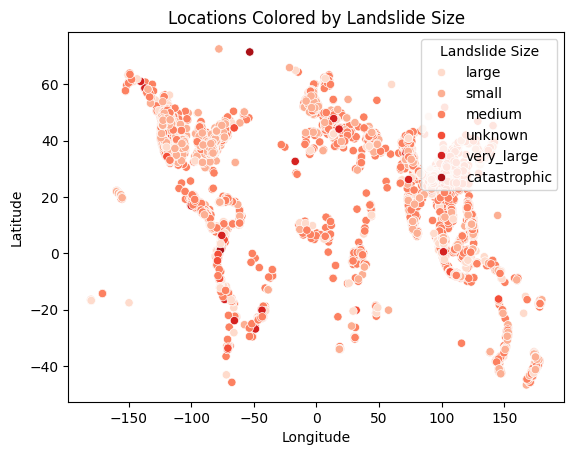

In [17]:

# plot of world map representing landslide strength

scatter = sns.scatterplot(x='longitude', y='latitude', hue='landslide_size', data=landslides, palette='Reds')


# Getting legend handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Creating the legend
plt.legend(handles, labels, title='Landslide Size', loc='upper right')
plt.title('Locations Colored by Landslide Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



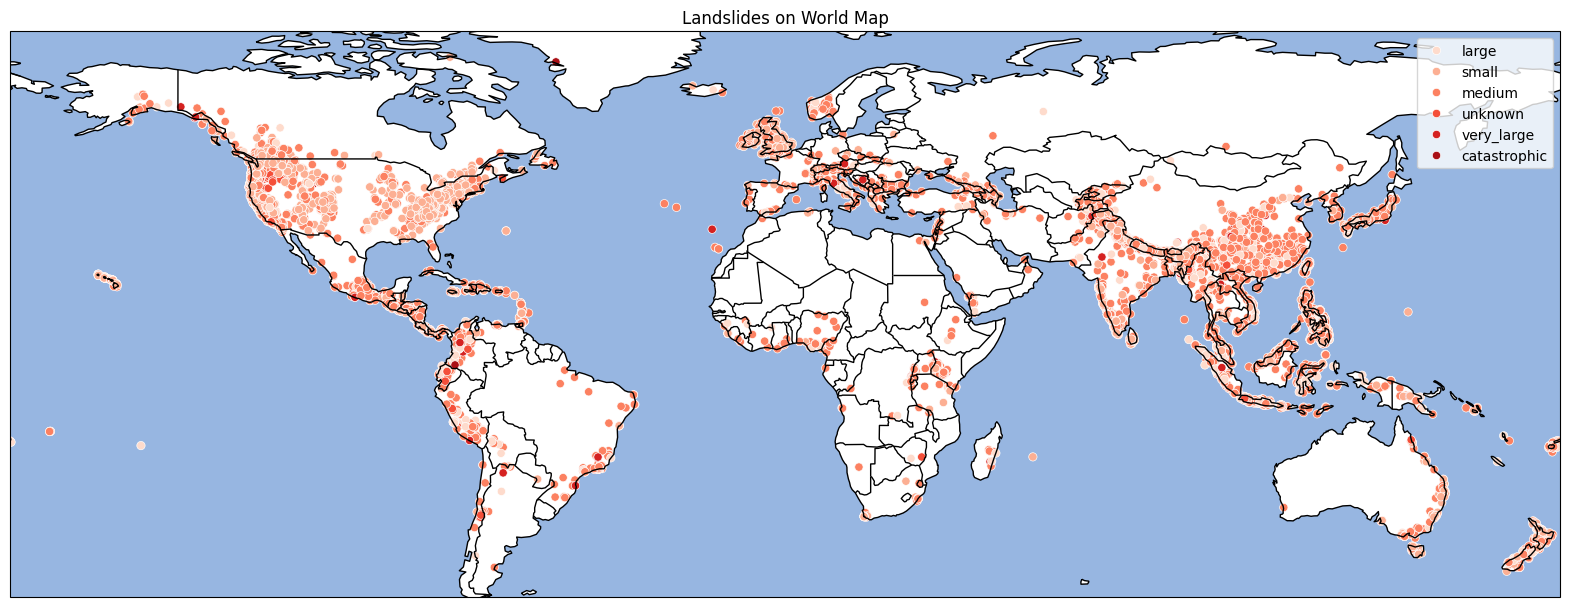

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Assuming you have longitude, latitude columns in your 'landslides' DataFrame
# Replace 'longitude' and 'latitude' with your actual column names
longitude = landslides['longitude']
latitude = landslides['latitude']

# Create a figure and axis with Cartopy projection
plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot world map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAND, edgecolor='black')

# Plot scatter points on the map
#ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), s=5, color='blue', label='Landslides')
sns.scatterplot(x='longitude', y='latitude',transform=ccrs.PlateCarree(), hue='landslide_size', data=landslides, palette='Reds')

# Add legend
plt.legend()

# Show the plot
plt.title('Landslides on World Map')
plt.show()



<Axes: ylabel='latitude'>

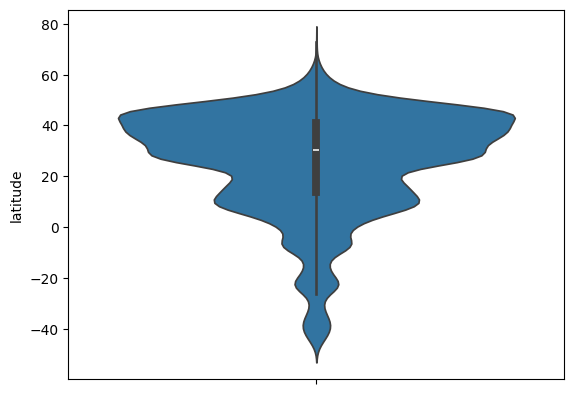

In [19]:
sns.violinplot(landslides['latitude'])

<Axes: ylabel='longitude'>

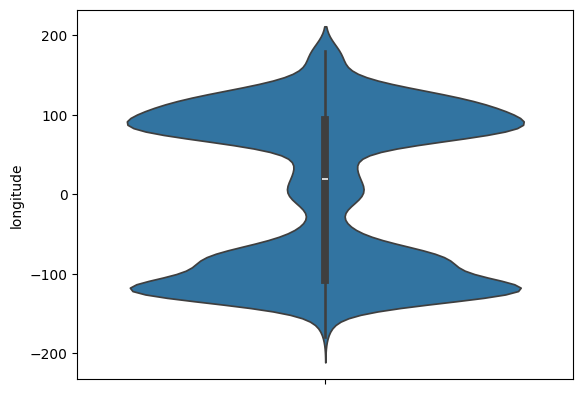

In [20]:
sns.violinplot(landslides['longitude'])


In [21]:
# Drop columns with longitude values > 180 or < -180 in the 'landslides' DataFrame
filtered_landslides = landslides.loc[(landslides['longitude'] <= 180) & (landslides['longitude'] >= -180)]

min_lon, max_lon = -45, -35
min_lat, max_lat = -25, -15


m=folium.Map(tiles="OpenStreetMap",max_bounds=True)
location_data = filtered_landslides[['latitude', 'longitude']]

southwest = [40.712, -74.227]  # Example coordinates for southwest corner (e.g., New York)
northeast = [34.052, -118.243]  # Example coordinates for northeast corner (e.g., Los Angeles)

# Set the bounds for the map
m.fit_bounds([southwest, northeast])



# plot heatmap
m.add_children(plugins.HeatMap(location_data, radius=10))
len(filtered_landslides)
m
